<a href="https://colab.research.google.com/github/xshen796/CodingClubPsych/blob/master/tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colocalization Practical 2
Ville Karhunen 


Autumn 2021

# Introduction

This practical demonstrates the use of HyPrColoc for multiple trait colocalization.
Angiotensin converting enzyme (ACE) inhibitors are a common class of medication used to treat hypertension, and here, we will examine whether this mechanism is related to reduction in Alzheimer's disease risk (Ryan et al. 2021).

#Housekeeping

In this section, we will configure the google colaboratory notebook to be linked with our google drive account, assign it to an R coding environment and set the working directory to your google drive folder. Finally, we will import various libraries from the 'R_libs' folder. 

Note: 
Google cloud platform mostly runs python. However, we can use a magic function (%%R) at the start of every cell to make that cell run R code. That is why you see **%%R** in all of the cells below. This is not required in an environment that is natively designed to run on R, such as Rstudio. 

In [ ]:
#Load up the google drive - note this does not need the R magic function as it is a python code! 
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Enable R - %%R is still required at the start of each cell to run the code in R 
%load_ext rpy2.ipython

In [ ]:
#Set working directory - this uses the python package 'os' to set our working directory as the google drive folder
#Again this is written in python code and we do not need to warn the notebook that the code is in R 
os.chdir('/content/drive/MyDrive')

Install the relevant packages: 



In [ ]:
#Import libraries in R - note: the use of %%R denoting that the code in this cell is written in R! 
%%R
library(hyprcoloc, lib = '/content/drive/MyDrive/coloc_tutorials/R_libs')
library(ggplot2, lib = '/content/drive/MyDrive/coloc_tutorials/R_libs')
library(ggpubr, lib = '/content/drive/MyDrive/coloc_tutorials/R_libs')
library(plyr, lib = '/content/drive/MyDrive/coloc_tutorials/R_libs')
library(data.table, lib = '/content/drive/MyDrive/coloc_tutorials/R_libs')
library(cowplot, lib = '/content/drive/MyDrive/coloc_tutorials/R_libs')

R[write to console]: 
Attaching package: ‘plyr’


R[write to console]: The following object is masked from ‘package:ggpubr’:

    mutate


R[write to console]: data.table 1.14.2 using 1 threads (see ?getDTthreads).  Latest news: r-datatable.com

R[write to console]: 
Attaching package: ‘cowplot’


R[write to console]: The following object is masked from ‘package:ggpubr’:

    get_legend




# Read data

For convenience, a single '.RData' file is provided, which includes the following objects:

* 'd1' -- genetic associations for ACE gene expression levels in brain cortex within *ACE* gene, [de Klein et al. (2021)](https://doi.org/10.1101/2021.03.01.433439)

* 'd2' -- genetic associations for systolic blood pressure within *ACE* gene, [Evangelou et al. (2018)](https://doi.org/10.1038/s41588-018-0205-x)

* 'd3' -- genetic associations for Alzheimer's disease risk within *ACE* gene, [de Rojas et al. (2021)](https://doi.org/10.1038/s41467-021-22491-8)

In [ ]:
#import data 
%%R
d1 <- fread('https://storage.googleapis.com/gidd_mr_course/ace_eqtl.csv')
d2 <- fread('https://storage.googleapis.com/gidd_mr_course/coloc_sbp.csv')
d3 <- fread('https://storage.googleapis.com/gidd_mr_course/coloc_ace.csv')

 [7%] Downloaded 692 bytes...
 [22%] Downloaded 2078 bytes...
 [38%] Downloaded 3464 bytes...
 [53%] Downloaded 4850 bytes...
 [68%] Downloaded 6236 bytes...
 [77%] Downloaded 7029 bytes...
 [92%] Downloaded 8415 bytes...
 [100%] Downloaded 9064 bytes...
R[write to console]: 

 [8%] Downloaded 685 bytes...
 [26%] Downloaded 2071 bytes...
 [44%] Downloaded 3457 bytes...
 [62%] Downloaded 4843 bytes...
 [79%] Downloaded 6229 bytes...
 [89%] Downloaded 7025 bytes...
 [100%] Downloaded 7806 bytes...
R[write to console]: 

 [5%] Downloaded 683 bytes...
 [16%] Downloaded 2069 bytes...
 [27%] Downloaded 3455 bytes...
 [39%] Downloaded 4841 bytes...
 [50%] Downloaded 6227 bytes...
 [56%] Downloaded 7020 bytes...
 [67%] Downloaded 8406 bytes...
 [78%] Downloaded 9792 bytes...
 [90%] Downloaded 11178 bytes...
 [100%] Downloaded 12408 bytes...
R[write to console]: 



In [ ]:
# add the following three rows:
%%R
d1$V1 <- NULL
d2$V1 <- NULL
d3$V1 <- NULL

Visualizing the genetic associations:

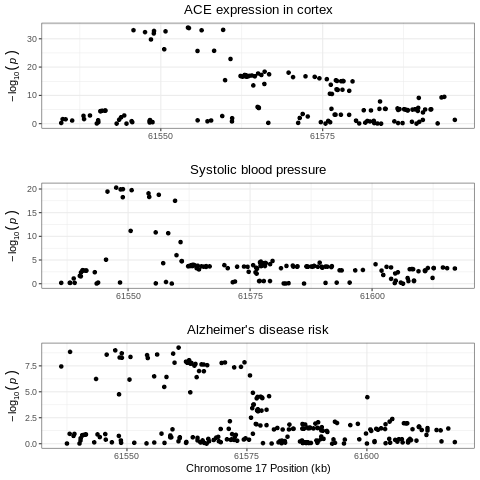

In [ ]:
%%R
p1 <- ggplot(d1, aes(x = POS, y = -log10(p_cortex))) +
  geom_point() +
  labs(x = "", y = bquote(-log[10](italic(p))),
       title = "ACE expression in cortex") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_x_continuous(breaks = c(61550000, 61575000, 61600000),
                     labels = c(61550, 61575, 61600))

p2 <- ggplot(d2, aes(x = POS, y = -log10(p_sbp))) +
  geom_point() +
  labs(x = "", y = bquote(-log[10](italic(p))),
         title = "Systolic blood pressure") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_x_continuous(breaks = c(61550000, 61575000, 61600000),
                     labels = c(61550, 61575, 61600))

p3 <- ggplot(d3, aes(x = POS, y = -log10(p_ad))) +
  geom_point() +
  labs(x = "", y = bquote(-log[10](italic(p))),
         title = "Alzheimer's disease risk") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_x_continuous(name = paste0("Chromosome 17 Position (kb)"),
                     breaks = c(61550000, 61575000, 61600000),
                     labels = c(61550, 61575, 61600))


ggpubr::ggarrange(p1, p2, p3,
 heights = c(1, 1, 1), nrow = 3, 
 ncol = 1, align = "hv")


We will prepare these data for HyPrcoloc.

In [ ]:
%%R
d0 <- data.frame(rsid = unique(c(d1$rsid, d2$rsid, d3$rsid)))

In [ ]:
%%R
d_hyprcoloc <- Reduce(function(x, y) plyr::join(x, y), list(d0, d1, d2, d3))
d_hyprcoloc <- d_hyprcoloc[complete.cases(d_hyprcoloc),]

R[write to console]: Joining by: rsid

R[write to console]: Joining by: rsid, CHR, POS

R[write to console]: Joining by: rsid, CHR, POS



In [ ]:
%%R
betas <- as.matrix(d_hyprcoloc[,grepl("beta_", names(d_hyprcoloc))])
ses <- as.matrix(d_hyprcoloc[,grepl("se_", names(d_hyprcoloc))])

Next, we run HyPrColoc.
For prior probabilities, we use the default values: the prior probability for a variant associated with one trait = 1e-4, and the probability of a variant associated with another trait = 0.98.
See the [package vignette](https://rdrr.io/github/jrs95/hyprcoloc/f/vignettes/hyprcoloc.Rmd) for detailed information.

In [ ]:
%%R
hyprcoloc_results <- hyprcoloc(betas, ses, trait.names = c("cortex", "sbp", "ad"), snp.id = d_hyprcoloc$rsid,
                               binary.outcomes = c(0, 0, 1),
                               prior.1 = 1e-04, prior.c = 0.02)
hyprcoloc_results$results

  iteration          traits posterior_prob regional_prob candidate_snp
1         1 cortex, sbp, ad         0.8267             1        rs4291
  posterior_explained_by_snp dropped_trait
1                     0.3676            NA
